In [15]:
import tensorflow as tf
from tensorflow import keras


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [17]:
(X_TRAIN,Y_TRAIN),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [18]:
len(X_TRAIN)

60000

In [19]:
len(X_test)

10000

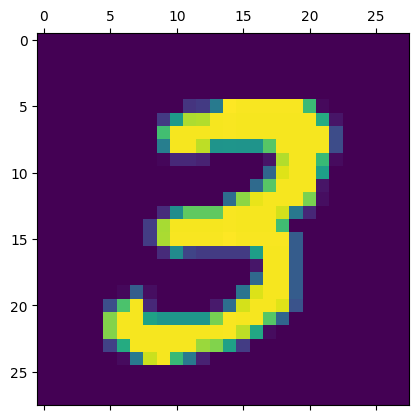

In [20]:
plt.matshow(X_TRAIN[7])

In [21]:
Y_TRAIN[7]

3

In [24]:
X_TRAIN = X_TRAIN / 255
X_test = X_test / 255

In [25]:
X_TRAIN_final=X_TRAIN.reshape(len(X_TRAIN),28*28)
X_test_final=X_test.reshape(len(X_test),28*28)

In [26]:
X_test_final.shape

(10000, 784)

In [33]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_TRAIN_final, Y_TRAIN, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1877 - accuracy: 0.5821
Epoch 2/8
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9767 - accuracy: 0.7077
Epoch 3/8
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7902 - accuracy: 0.7374
Epoch 4/8
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6263 - accuracy: 0.7619
Epoch 5/8
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4836 - accuracy: 0.7748
Epoch 6/8
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3601 - accuracy: 0.7879
Epoch 7/8
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2534 - accuracy: 0.7979
Epoch 8/8
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1615 - accuracy: 0.8078


In [34]:
model.evaluate(X_test_final,Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 1.1017 - accuracy: 0.8276


[1.1017102003097534, 0.8276000022888184]

In [35]:
y_predicted = model.predict(X_test_final)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([0.2385222 , 0.30453882, 0.28857654, 0.3797878 , 0.46136346,
       0.3585804 , 0.19448888, 0.891215  , 0.3231397 , 0.61738765],
      dtype=float32)

In [36]:
Y_test[0]

7

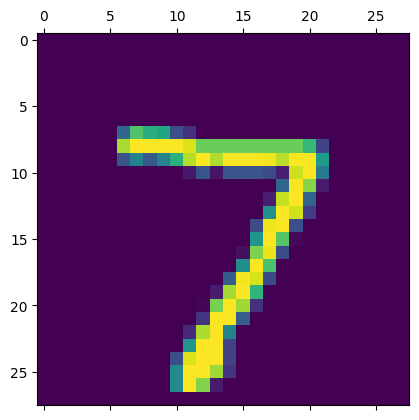

In [37]:
plt.matshow(X_test[0])

In [38]:
np.argmax(y_predicted[0])

7

In [39]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [40]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Text(95.72222222222221, 0.5, 'Truth')

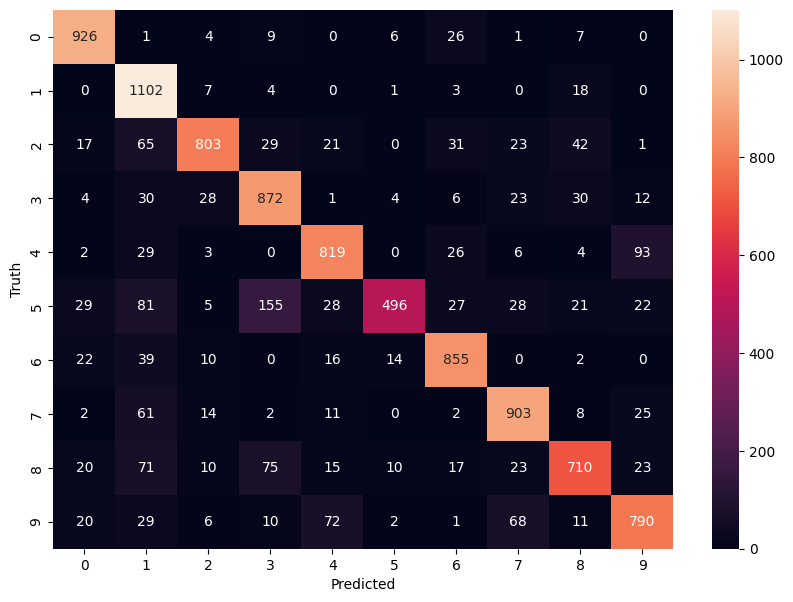

In [42]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_TRAIN_final, Y_TRAIN, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1881 - accuracy: 0.7162
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4977 - accuracy: 0.8701
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3896 - accuracy: 0.8933
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3464 - accuracy: 0.9026
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3218 - accuracy: 0.9089


In [45]:
model.evaluate(X_test_final,Y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.3038 - accuracy: 0.9133


[0.30383509397506714, 0.9132999777793884]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

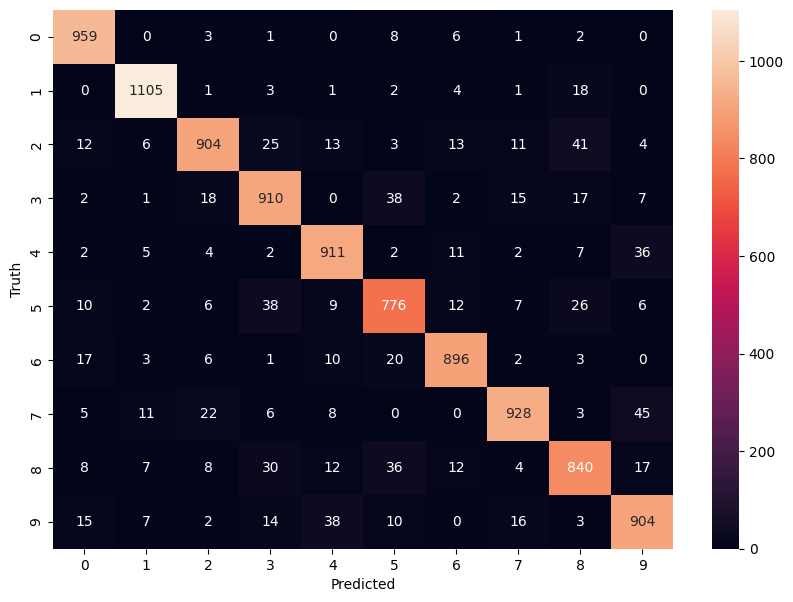

In [48]:
y_predicted = model.predict(X_test_final)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')